In [6]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))
  
import io
data=pd.read_csv(io.StringIO(uploaded['data.csv'].decode('utf-8')))

import pandas as pd


Saving data.csv to data (1).csv
User uploaded file "data.csv" with length 125204 bytes


In [7]:
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [0]:
del data['Unnamed: 32']

In [0]:
import numpy as np
import matplotlib.pyplot as plt
X = data.iloc[:,2:].values
y = data.iloc[:,1].values

In [0]:
#encoding our labels
from sklearn.preprocessing import LabelEncoder
Labelencoder = LabelEncoder()
y = Labelencoder.fit_transform(y)

In [0]:
#splitting data
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size  = 0.1,random_state = 0)


In [0]:
#normalizing our data
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)


In [13]:
X_train

array([[-0.52787029,  2.49821982, -0.59939466, ..., -1.74713139,
        -0.79044533, -0.91054389],
       [-0.55333608,  0.29431013, -0.60759343, ..., -0.62275667,
        -0.33646358, -0.83551633],
       [ 2.15452653,  0.40392257,  2.26525805, ...,  1.03846122,
        -0.11504791,  0.26488788],
       ...,
       [-1.3297598 , -0.21876938, -1.32088704, ..., -0.98271999,
        -0.718764  , -0.13637062],
       [-1.24940108, -0.24209117, -1.2835826 , ..., -1.74713139,
        -1.58690456, -1.01280367],
       [-0.74291476,  1.08958336, -0.71827692, ..., -0.2865488 ,
        -1.26354211,  0.19486216]])

In [15]:
X_test

array([[-0.19207516,  0.21655218, -0.11542614, ...,  1.60315155,
         1.38812047,  1.39561107],
       [-0.24797128,  1.29875111, -0.31114085, ..., -0.76400211,
        -0.79834577, -0.93437281],
       [-0.00967731, -0.89539007, -0.07447263, ..., -0.40317641,
        -1.38855752, -0.97661799],
       ...,
       [-0.46861385,  0.07241152, -0.46935075, ..., -0.49962508,
        -0.33652424, -0.40576652],
       [-0.75986205, -0.81073603, -0.78878818, ..., -0.67538685,
        -0.01842311,  0.13529668],
       [-0.80399056,  1.71744542, -0.84310547, ..., -1.40405566,
        -0.02225565, -0.77243298]])

In [16]:
! pip install keras

In [17]:
import keras
from keras.models import Sequential
from keras.layers import Dense


Using TensorFlow backend.


In [18]:
#adding the input and first hidden layer
model = Sequential()
model.add(Dense(output_dim = 16,init = 'uniform',activation = 'relu',input_dim = 30))

#adding the second hidden layer
model.add(Dense(output_dim = 16,init = 'uniform',activation = 'relu'))

#adding the output layer
model.add(Dense(output_dim = 1,init = 'uniform' ,activation = 'sigmoid'))



/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", input_dim=30, units=16, kernel_initializer="uniform")`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", units=16, kernel_initializer="uniform")`
  """
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="sigmoid", units=1, kernel_initializer="uniform")`
  


In [19]:
model.compile(optimizer = 'Adam', loss = 'binary_crossentropy', metrics = ['accuracy'])



Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [20]:
model.fit(X,y,batch_size = 100,epochs = 150)




Epoch 1/150





569/569 [==============================] - 1s 1ms/step - loss: 0.6784 - acc: 0.3726
Epoch 2/150
569/569 [==============================] - 0s 29us/step - loss: 0.6690 - acc: 0.3726
Epoch 3/150
569/569 [==============================] - 0s 27us/step - loss: 0.6590 - acc: 0.3726
Epoch 4/150
569/569 [==============================] - 0s 32us/step - loss: 0.6458 - acc: 0.3726
Epoch 5/150
569/569 [==============================] - 0s 25us/step - loss: 0.6264 - acc: 0.4974
Epoch 6/150
569/569 [==============================] - 0s 27us/step - loss: 0.6001 - acc: 0.7293
Epoch 7/150
569/569 [==============================] - 0s 26us/step - loss: 0.5642 - acc: 0.8260
Epoch 8/150
569/569 [==============================] - 0s 23us/step - loss: 0.5233 - acc: 0.9104
Epoch 9/150
569/569 [==============================] - 0s 27us/step - loss: 0.4765 - acc: 0.9086
Epoch 10/150
569/569 [==============================] - 0s 25us/step - loss: 0.4263 - acc: 0.9156
Epoch 11/150
569/569 [

In [0]:
# Predicting the Test set results
y_pred = model.predict(X_test)
y_pred = (y_pred > 0.5)

In [0]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

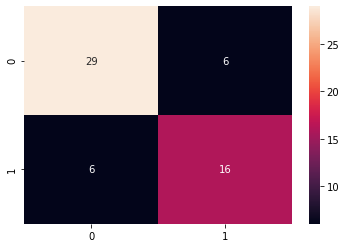

In [23]:
import seaborn as sns
sns.heatmap(cm,annot=True)
plt.savefig('h.png')

In [24]:
(29+16)/(29+16+12)

0.7894736842105263

In [25]:
'''K_fold'''

'K_fold'

In [0]:
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import cross_val_score


In [0]:
def built_classifier():
  classifier = Sequential()
  classifier.add(Dense(output_dim=16, init='uniform', activation='relu',input_dim=30))
  classifier.add(Dense(output_dim=16, init='uniform', activation='relu'))
  classifier.add(Dense(output_dim=1, init='uniform', activation='sigmoid'))
  classifier.compile(optimizer="Adam", loss='binary_crossentropy', metrics=['accuracy'])
  return classifier

classifier = KerasClassifier(build_fn = built_classifier, batch_size = 100, epochs=100)
accuracies = cross_val_score(estimator = classifier, X = X_train, y=y_train, cv=10, n_jobs =-1)

In [33]:
accuracies

array([0.94230771, 0.96153843, 1.        , 0.98039216, 0.96078432,
       0.94117647, 0.98039216, 0.98039216, 1.        , 0.98039216])

In [34]:
accuracies.mean()

0.9727375566959381

In [0]:
#so using kflod we achieve training accuracy upto 97%